In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/procrimewithtaswd/ProcessedCrimes1-TASWD.csv


In [2]:
df = pd.read_csv('/kaggle/input/procrimewithtaswd/ProcessedCrimes1-TASWD.csv')
df = df.drop("Unnamed: 0", axis=1)
df

,Date,Time,Description,Location,Latitude,Longitude,City,Type,Attempted,Severity,Weekday,Daytime
0,2020-01-08,22:30:00,BATTERY - SIMPLE ASSAULT,1100 W 39TH PL,34.014100,-118.297800,Los Angeles,BATTERY,No,MISDEMEANOR,Weekday,Nighttime
1,2020-01-01,03:30:00,BATTERY - SIMPLE ASSAULT,700 S HILL ST,34.045900,-118.254500,Los Angeles,BATTERY,No,MISDEMEANOR,Weekday,Nighttime
2,2020-02-13,12:00:00,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,200 E 6TH ST,34.044800,-118.247400,Los Angeles,SEXUAL OFFENCE,No,FELONY,Weekday,Daytime
3,2020-01-01,17:30:00,VANDALISM - MISDEAMEANOR ($399 OR UNDER),5400 CORTEEN PL,34.168500,-118.401900,Los Angeles,VANDALISM,No,MISDEMEANOR,Weekday,Daytime
4,2020-01-01,04:15:00,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",14400 TITUS ST,34.219800,-118.446800,Los Angeles,VANDALISM,No,FELONY,Weekday,Nighttime
...,...,...,...,...,...,...,...,...,...,...,...,...
3779210,2015-05-01,22:00:00,Theft From Motor Vehicle,5400 BLOCK OF SW VIEW POINT TER,45.484172,-122.677847,Portland,THEFT,No,MISDEMEANOR,Weekday,Nighttime
3779211,2015-05-01,16:00:00,Vandalism,W BURNSIDE ST / SW 5TH AVE,45.523080,-122.675409,Portland,VANDALISM,No,MISDEMEANOR,Weekday,Daytime
3779212,2015-05-01,16:00:00,Vandalism,400 BLOCK OF SW SALMON ST,45.516624,-122.678174,Portland,VANDALISM,No,MISDEMEANOR,Weekday,Daytime
3779213,2015-05-01,12:55:00,Vandalism,1900 BLOCK OF SE 6TH AVE,45.509024,-122.659847,Portland,VANDALISM,No,MISDEMEANOR,Weekday,Daytime


In [3]:
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Day'] = pd.to_datetime(df['Date']).dt.day
# df['Hour'] = pd.to_datetime(df['Time']).dt.hour
df.head()

,Date,Time,Description,Location,Latitude,Longitude,City,Type,Attempted,Severity,Weekday,Daytime,Year,Month,Day
0,2020-01-08,22:30:00,BATTERY - SIMPLE ASSAULT,1100 W 39TH PL,34.0141,-118.2978,Los Angeles,BATTERY,No,MISDEMEANOR,Weekday,Nighttime,2020,1,8
1,2020-01-01,03:30:00,BATTERY - SIMPLE ASSAULT,700 S HILL ST,34.0459,-118.2545,Los Angeles,BATTERY,No,MISDEMEANOR,Weekday,Nighttime,2020,1,1
2,2020-02-13,12:00:00,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,200 E 6TH ST,34.0448,-118.2474,Los Angeles,SEXUAL OFFENCE,No,FELONY,Weekday,Daytime,2020,2,13
3,2020-01-01,17:30:00,VANDALISM - MISDEAMEANOR ($399 OR UNDER),5400 CORTEEN PL,34.1685,-118.4019,Los Angeles,VANDALISM,No,MISDEMEANOR,Weekday,Daytime,2020,1,1
4,2020-01-01,04:15:00,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",14400 TITUS ST,34.2198,-118.4468,Los Angeles,VANDALISM,No,FELONY,Weekday,Nighttime,2020,1,1


In [4]:
# Replace values in the 'Type' column
df['Type'] = df['Type'].replace({
    'PROSTITUITON AND COMMERCIALIZED VICE': 'PROSTITUTION AND COMMERCIALIZED VICE',
    'CRIMES AGAINST CHILDREN': 'CRIME AGAINST CHILDREN'
})
df['City'] = df['City'].replace('Philadephia', 'Philadelphia')

# Print the updated DataFrame
df.head()

,Date,Time,Description,Location,Latitude,Longitude,City,Type,Attempted,Severity,Weekday,Daytime,Year,Month,Day
0,2020-01-08,22:30:00,BATTERY - SIMPLE ASSAULT,1100 W 39TH PL,34.0141,-118.2978,Los Angeles,BATTERY,No,MISDEMEANOR,Weekday,Nighttime,2020,1,8
1,2020-01-01,03:30:00,BATTERY - SIMPLE ASSAULT,700 S HILL ST,34.0459,-118.2545,Los Angeles,BATTERY,No,MISDEMEANOR,Weekday,Nighttime,2020,1,1
2,2020-02-13,12:00:00,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,200 E 6TH ST,34.0448,-118.2474,Los Angeles,SEXUAL OFFENCE,No,FELONY,Weekday,Daytime,2020,2,13
3,2020-01-01,17:30:00,VANDALISM - MISDEAMEANOR ($399 OR UNDER),5400 CORTEEN PL,34.1685,-118.4019,Los Angeles,VANDALISM,No,MISDEMEANOR,Weekday,Daytime,2020,1,1
4,2020-01-01,04:15:00,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",14400 TITUS ST,34.2198,-118.4468,Los Angeles,VANDALISM,No,FELONY,Weekday,Nighttime,2020,1,1


In [5]:
print(len(df[df['Type']=='OTHER']))

546935


In [6]:
data = df[df['Type']!='OTHER']
data

,Date,Time,Description,Location,Latitude,Longitude,City,Type,Attempted,Severity,Weekday,Daytime,Year,Month,Day
0,2020-01-08,22:30:00,BATTERY - SIMPLE ASSAULT,1100 W 39TH PL,34.014100,-118.297800,Los Angeles,BATTERY,No,MISDEMEANOR,Weekday,Nighttime,2020,1,8
1,2020-01-01,03:30:00,BATTERY - SIMPLE ASSAULT,700 S HILL ST,34.045900,-118.254500,Los Angeles,BATTERY,No,MISDEMEANOR,Weekday,Nighttime,2020,1,1
2,2020-02-13,12:00:00,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,200 E 6TH ST,34.044800,-118.247400,Los Angeles,SEXUAL OFFENCE,No,FELONY,Weekday,Daytime,2020,2,13
3,2020-01-01,17:30:00,VANDALISM - MISDEAMEANOR ($399 OR UNDER),5400 CORTEEN PL,34.168500,-118.401900,Los Angeles,VANDALISM,No,MISDEMEANOR,Weekday,Daytime,2020,1,1
4,2020-01-01,04:15:00,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",14400 TITUS ST,34.219800,-118.446800,Los Angeles,VANDALISM,No,FELONY,Weekday,Nighttime,2020,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3779210,2015-05-01,22:00:00,Theft From Motor Vehicle,5400 BLOCK OF SW VIEW POINT TER,45.484172,-122.677847,Portland,THEFT,No,MISDEMEANOR,Weekday,Nighttime,2015,5,1
3779211,2015-05-01,16:00:00,Vandalism,W BURNSIDE ST / SW 5TH AVE,45.523080,-122.675409,Portland,VANDALISM,No,MISDEMEANOR,Weekday,Daytime,2015,5,1
3779212,2015-05-01,16:00:00,Vandalism,400 BLOCK OF SW SALMON ST,45.516624,-122.678174,Portland,VANDALISM,No,MISDEMEANOR,Weekday,Daytime,2015,5,1
3779213,2015-05-01,12:55:00,Vandalism,1900 BLOCK OF SE 6TH AVE,45.509024,-122.659847,Portland,VANDALISM,No,MISDEMEANOR,Weekday,Daytime,2015,5,1


In [7]:
print(len(df[df['City']=='Los Angeles']))
print(len(df[df['City']=='Baltimore']))
print(len(df[df['City']=='Philadelphia']))
print(len(df[df['City']=='Portland']))

852950
274322
2219602
432341


In [8]:
print(len(data[data['City']=='Los Angeles']))
print(len(data[data['City']=='Baltimore']))
print(len(data[data['City']=='Philadelphia']))
print(len(data[data['City']=='Portland']))

844558
274322
1681060
432340


In [9]:
# Sample Baltimore data (assuming 'City' is the column name)
phil_data = data[data['City'] == 'Philadelphia']
downsampled_phil = phil_data.sample(274322, random_state=42)  # Set random_state for reproducibility

# Combine downsampled Baltimore with data from other cities
data = pd.concat([downsampled_phil, data[data['City'] != 'Philadelphia']])
data.head()

,Date,Time,Description,Location,Latitude,Longitude,City,Type,Attempted,Severity,Weekday,Daytime,Year,Month,Day
2552042,2007-05-04,10:43:00,Other Assaults,11500 BLOCK ROOSEVELT BLVD,40.103641,-75.003746,Philadelphia,ASSAULT,No,FELONY,Weekday,Daytime,2007,5,4
1550161,2011-05-07,12:35:00,Theft from Vehicle,1700 BLOCK SPRING GARDEN ST,39.963060,-75.167052,Philadelphia,THEFT,No,FELONY,Weekend,Daytime,2011,5,7
1883411,2013-12-23,20:07:00,Fraud,0 BLOCK MIFFLIN ST,39.923506,-75.143638,Philadelphia,FRAUD,No,FELONY,Weekday,Evening,2013,12,23
2622795,2007-12-11,20:58:00,Narcotic / Drug Law Violations,3400 BLOCK DILLMAN ST,40.003545,-75.133345,Philadelphia,DRUG CRIME,No,MISDEMEANOR,Weekday,Evening,2007,12,11
1588161,2015-09-12,07:23:00,Theft from Vehicle,5700 BLOCK N 02ND ST 1,40.038424,-75.124891,Philadelphia,THEFT,No,FELONY,Weekend,Daytime,2015,9,12


In [10]:
print(len(data[data['City']=='Los Angeles']))
print(len(data[data['City']=='Baltimore']))
print(len(data[data['City']=='Philadelphia']))
print(len(data[data['City']=='Portland']))

844558
274322
274322
432340


In [11]:
print(len(data['Type'].unique()))

33


In [12]:
print(len(data['Severity'].unique()))

3


In [13]:
# Sample Baltimore data (assuming 'City' is the column name)
la_data = data[data['City'] == 'Los Angeles']
downsampled_la = la_data.sample(274322, random_state=42)  # Set random_state for reproducibility

# Combine downsampled Baltimore with data from other cities
data = pd.concat([downsampled_la, data[data['City'] != 'Los Angeles']])
data.head()

,Date,Time,Description,Location,Latitude,Longitude,City,Type,Attempted,Severity,Weekday,Daytime,Year,Month,Day
383961,2021-09-03,16:30:00,BATTERY POLICE (SIMPLE),2400 FAIRMOUNT ST,34.0518,-118.2039,Los Angeles,BATTERY,No,MISDEMEANOR,Weekday,Daytime,2021,9,3
214405,2021-10-22,19:15:00,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",21ST ST,33.7252,-118.2990,Los Angeles,ASSAULT,No,FELONY,Weekday,Evening,2021,10,22
303107,2021-09-23,22:00:00,CRIMINAL THREATS - NO WEAPON DISPLAYED,3200 E OLYMPIC BL,34.0198,-118.2097,Los Angeles,THREAT,No,MISDEMEANOR,Weekday,Nighttime,2021,9,23
708962,2023-07-08,19:00:00,BURGLARY FROM VEHICLE,3900 SANTA ROSALIA DR,34.0116,-118.3412,Los Angeles,BURGLARY,No,FELONY,Weekend,Evening,2023,7,8
44962,2020-05-06,23:18:00,VANDALISM - MISDEAMEANOR ($399 OR UNDER),6TH,34.0382,-118.2345,Los Angeles,VANDALISM,No,MISDEMEANOR,Weekday,Nighttime,2020,5,6


In [14]:
print(len(data[data['City']=='Los Angeles']))
print(len(data[data['City']=='Baltimore']))
print(len(data[data['City']=='Philadelphia']))
print(len(data[data['City']=='Portland']))

274322
274322
274322
432340


In [15]:
# Sample Baltimore data (assuming 'City' is the column name)
port_data = data[data['City'] == 'Portland']
downsampled_port = port_data.sample(274322, random_state=42)  # Set random_state for reproducibility

# Combine downsampled Baltimore with data from other cities
data = pd.concat([downsampled_port, data[data['City'] != 'Portland']])
data.head()

,Date,Time,Description,Location,Latitude,Longitude,City,Type,Attempted,Severity,Weekday,Daytime,Year,Month,Day
3679880,2017-05-22,04:10:00,Vandalism,3600 BLOCK OF NE SANDY BLVD,45.533433,-122.626262,Portland,VANDALISM,No,MISDEMEANOR,Weekday,Nighttime,2017,5,22
3477116,2021-05-22,18:45:00,Theft of Motor Vehicle Parts or Accessories,5900 BLOCK OF S VIRGINIA AVE,45.480801,-122.673743,Portland,THEFT,No,FELONY,Weekend,Evening,2021,5,22
3453018,2021-10-22,16:47:00,Theft From Motor Vehicle,1800 BLOCK OF SW 5TH AVE,45.510454,-122.682035,Portland,THEFT,No,MISDEMEANOR,Weekday,Daytime,2021,10,22
3380735,2022-12-19,12:29:00,Identity Theft,1900 BLOCK OF NE 65TH AVE,45.536421,-122.596634,Portland,FRAUD,No,FELONY,Weekday,Daytime,2022,12,19
3651439,2017-12-11,10:31:00,Shoplifting,600 BLOCK OF SE GRAND AVE,45.518294,-122.660801,Portland,THEFT,No,MISDEMEANOR,Weekday,Daytime,2017,12,11


In [16]:
print(len(data[data['City']=='Los Angeles']))
print(len(data[data['City']=='Baltimore']))
print(len(data[data['City']=='Philadelphia']))
print(len(data[data['City']=='Portland']))

274322
274322
274322
274322


In [17]:
print(len(data['Type'].unique()))

33


### Crime type LSTM

In [18]:
type_data = data[['City', 'Year', 'Month', 'Day', 'Latitude', 'Longitude', 'Weekday', 'Daytime', 'Type']]
type_data

,City,Year,Month,Day,Latitude,Longitude,Weekday,Daytime,Type
3679880,Portland,2017,5,22,45.533433,-122.626262,Weekday,Nighttime,VANDALISM
3477116,Portland,2021,5,22,45.480801,-122.673743,Weekend,Evening,THEFT
3453018,Portland,2021,10,22,45.510454,-122.682035,Weekday,Daytime,THEFT
3380735,Portland,2022,12,19,45.536421,-122.596634,Weekday,Daytime,FRAUD
3651439,Portland,2017,12,11,45.518294,-122.660801,Weekday,Daytime,THEFT
...,...,...,...,...,...,...,...,...,...
1127267,Baltimore,2012,1,1,39.261320,-76.671950,Weekend,Nighttime,THEFT
1127268,Baltimore,2012,1,1,39.324930,-76.538290,Weekend,Nighttime,THEFT
1127269,Baltimore,2012,1,1,39.295730,-76.584970,Weekend,Nighttime,THEFT
1127270,Baltimore,2012,1,1,39.347010,-76.545780,Weekend,Nighttime,BURGLARY


In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import LSTM, Dense, Embedding, Input
from tensorflow.keras.utils import to_categorical  # For one-hot encoding
from sklearn.preprocessing import MinMaxScaler, LabelEncoder # For normalization
import pickle

2024-06-04 06:06:49.361786: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-04 06:06:49.361920: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-04 06:06:49.545684: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [20]:
def preprocess_data(df):
    # Extract the labels (Type) and drop from the DataFrame
    crime_type_labels = df['Type'].values
    df = df.drop('Type', axis=1)

    # Initialize the encoders and scalers
    city_encoder = LabelEncoder()
    weekday_encoder = LabelEncoder()
    daytime_encoder = LabelEncoder()

    # Encode categorical features
    df['City'] = city_encoder.fit_transform(df['City'])
    df['Weekday'] = weekday_encoder.fit_transform(df['Weekday'])
    df['Daytime'] = daytime_encoder.fit_transform(df['Daytime'])

    # Save the encoder objects for deployment
    with open('city_encoder.pkl', 'wb') as f:
        pickle.dump(city_encoder, f)
    with open('weekday_encoder.pkl', 'wb') as f:
        pickle.dump(weekday_encoder, f)
    with open('daytime_encoder.pkl', 'wb') as f:
        pickle.dump(daytime_encoder, f)

    # One-hot encode the labels using the encoded integers
    city_encoding = to_categorical(df['City'].values)
    weekday_encoding = to_categorical(df['Weekday'].values)
    daytime_encoding = to_categorical(df['Daytime'].values)

    # Normalize numerical features (Year, Month, Day)
    numerical_features = df[['Year', 'Month', 'Day']].values
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(numerical_features)

    # Normalize latitude and longitude
    latitude_scaler = MinMaxScaler()
    longitude_scaler = MinMaxScaler()
    normalized_lat = latitude_scaler.fit_transform(df['Latitude'].values.reshape(-1, 1))[:, 0]
    normalized_lon = longitude_scaler.fit_transform(df['Longitude'].values.reshape(-1, 1))[:, 0]

    # Encode the crime type labels
    type_encoder = LabelEncoder()
    type_labels = type_encoder.fit_transform(crime_type_labels)
    type_encoding = to_categorical(type_labels)

    # Save the type encoder
    with open('type_encoder.pkl', 'wb') as f:
        pickle.dump(type_encoder, f)

    # Combine all preprocessed features
    normalized_lat_lon = np.column_stack((normalized_lat, normalized_lon))
    preprocessed_data = np.concatenate([
        city_encoding,
        normalized_data,
        normalized_lat_lon,
        weekday_encoding,
        daytime_encoding
    ], axis=1)

    return preprocessed_data, scaler, latitude_scaler, longitude_scaler, type_encoding

In [21]:
from tensorflow.keras.layers import Input, LSTM, Dense, Reshape
from tensorflow.keras.models import Model

In [22]:
# def build_model(num_features, num_crime_types):
#     inputs = Input(shape=(num_features,))

#     # Reshape layer to adapt input shape for LSTM
#     reshaped_inputs = Reshape((1, num_features))(inputs)

#     # LSTM layer
#     lstm_layer = LSTM(64, return_sequences=False)(reshaped_inputs)  # Adjust units as needed

#     # Dense layer
#     dense_layer = Dense(32, activation='relu')(lstm_layer)  # Adjust units and activation

#     # Output layer with sigmoid activation for multi-label classification
#     outputs = Dense(num_crime_types, activation='sigmoid')(dense_layer)

#     model = Model(inputs=inputs, outputs=outputs)

#     # Compile the model with appropriate loss function and metrics
#     opt = keras.optimizers.Adam(learning_rate=0.001)
#     model.compile(loss='binary_crossentropy', optimizer=opt,
#                   metrics=['accuracy', 'loss', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

#     return model

**1 Layer LSTM, 2 Dense**

In [23]:
from sklearn.model_selection import train_test_split

crime_data = type_data

# Preprocess the data
preprocessed_data, scaler, latitude_scaler, longitude_scaler, type_encoding = preprocess_data(crime_data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(preprocessed_data, type_encoding, test_size=0.2, random_state=42)

# Convert NumPy arrays to TensorFlow tensors
X_train_tf = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test_tf = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_test_tf = tf.convert_to_tensor(y_test, dtype=tf.float32)


# Check the shapes to ensure they are correct
print(X_train_tf.shape, X_test_tf.shape, y_train_tf.shape, y_test_tf.shape)

(877830, 14) (219458, 14) (877830, 33) (219458, 33)


In [24]:
from imblearn.over_sampling import SMOTE
# Decode y_train to get original integer labels
y_train_integers = np.argmax(y_train_tf, axis=1)

# Assuming y_train_integers is already defined
unique, counts = np.unique(y_train_integers, return_counts=True)
class_distribution = dict(zip(unique, counts))
# print(pd.DataFrame(list(class_distribution.items()), columns=['Class', 'Count']))


In [25]:
from imblearn.over_sampling import SMOTE

# Determine the minimum class size
min_class_size = min(counts)

# Set k_neighbors to a value less than the minimum class size
k_neighbors = max(1, min_class_size - 1)

# Apply SMOTE with the adjusted k_neighbors parameter
smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tf, y_train_integers)

# Ensure y_train_resampled is in the correct one-hot encoded format
y_train_resampled = to_categorical(y_train_resampled, num_classes=y_train_tf.shape[1])


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Reshape, Input

def build_model(num_features, num_crime_types):
    model = Sequential([
        Input(shape=(num_features,)),
        Reshape((1, num_features)),
        LSTM(64, return_sequences=False),
        Dense(32, activation='relu'),
        Dense(num_crime_types, activation='softmax')
    ])

    # Compile the model with appropriate loss function and metrics
    opt = keras.optimizers.Adam(learning_rate=0.05)
    model.compile(loss='categorical_crossentropy', optimizer=opt,
                  metrics=['accuracy', 'precision', 'recall'])

    return model


In [27]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Define number of features and number of crime types
num_features = X_train_tf.shape[1]
num_crime_types = y_train_tf.shape[1]

# Build the model
model = build_model(num_features, num_crime_types)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-2)

# Train the model
history = model.fit(
    X_train_tf, y_train_tf,
    epochs=15,  # Adjust epochs as needed
    batch_size=512,  # Adjust batch size as needed
    validation_data=(X_test_tf, y_test_tf), callbacks=[early_stopping, reduce_lr], verbose=1
)

# Evaluate the model
loss, accuracy, precision, recall = model.evaluate(X_test_tf, y_test_tf)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")
print(f"Test Precision: {precision}")
print(f"Test Recall: {recall}")

Epoch 1/15
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.4093 - loss: 1.8134 - precision: 0.5464 - recall: 0.1463 - val_accuracy: 0.4109 - val_loss: 1.7719 - val_precision: 0.5552 - val_recall: 0.1651 - learning_rate: 0.0500
Epoch 2/15
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.4123 - loss: 1.7691 - precision: 0.5565 - recall: 0.1605 - val_accuracy: 0.4101 - val_loss: 1.7726 - val_precision: 0.5332 - val_recall: 0.2160 - learning_rate: 0.0500
Epoch 3/15
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.4131 - loss: 1.7663 - precision: 0.5578 - recall: 0.1614 - val_accuracy: 0.4103 - val_loss: 1.7693 - val_precision: 0.5355 - val_recall: 0.1940 - learning_rate: 0.0500
Epoch 4/15
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.4115 - loss: 1.7690 - precision: 0.5584 - recall: 0.1544 - val_accuracy: 0.4119 - val_loss: 1.7740 - val_precision: 0.5622 - val_recall: 0.1404 - learning_rate: 0.0500
Epoch 5/15
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/st

In [28]:
# Predict and evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_tf, axis=1)

6859/6859 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.00      0.00      0.00       941
           2       0.27      0.14      0.18     38226
           3       0.00      0.00      0.00      4684
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00     24035
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00      1307
           8       0.00      0.00      0.00       520
           9       0.00      0.00      0.00      1668
          10       0.00      0.00      0.00      5758
          11       0.00      0.00      0.00         7
          12       0.00      0.00      0.00       140
          13       0.00      0.00      0.00        23
          14       0.00      0.00      0.00       944
          15       0.32      0.05      0.08     10616
          16       0.00      0.00      0.00       778
          17       0.00    

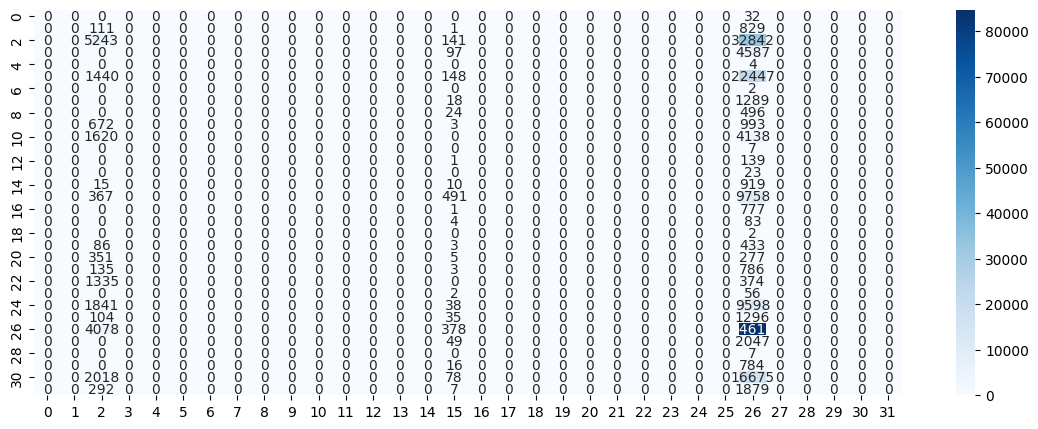

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

plt.figure(figsize=(14, 5))
# Classification report and confusion matrix
print(classification_report(y_true_classes, y_pred_classes))
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.show()


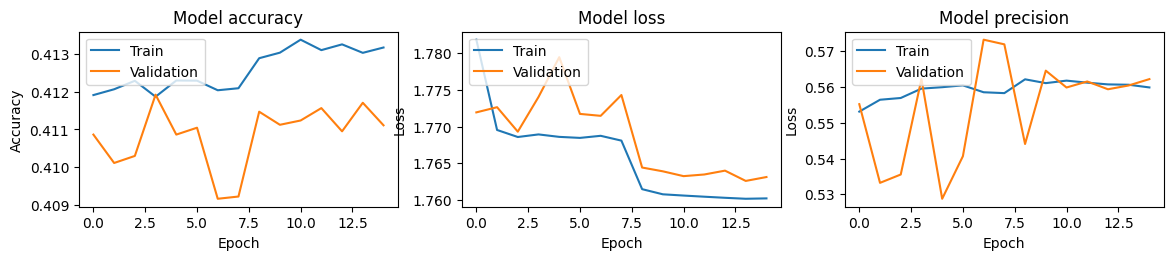

In [30]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(2, 3, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(2, 3, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(2, 3, 3)
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('Model precision')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [33]:
# Get predictions
predictions = model.predict(X_test_tf)

# Get top 3 crime types
top_3_indices = np.argsort(predictions, axis=1)[:, -3:][:, ::-1]

def load_type_encoder(encoder_filename):
    with open(encoder_filename, 'rb') as f:
        type_encoder = pickle.load(f)
    return type_encoder

# Example usage:
type_encoder = load_type_encoder('/kaggle/working/type_encoder.pkl')

# Initialize an empty list to store the top 3 predicted crime types for each sample
top_3_labels = []

# Loop through each sample in top_3_indices and decode the labels
for indices in top_3_indices:
    labels = type_encoder.inverse_transform(indices)
    top_3_labels.append(labels)

# Convert the list to a numpy array
top_3_labels = np.array(top_3_labels)

print("Top 3 predicted crime types for the test set:")
print(top_3_labels)
# Load encoder files
def load_encoder(encoder_filename):
    with open(encoder_filename, 'rb') as f:
        encoder = pickle.load(f)
    return encoder

# Load label encoders
city_encoder = load_encoder('city_encoder.pkl')
weekday_encoder = load_encoder('weekday_encoder.pkl')
daytime_encoder = load_encoder('daytime_encoder.pkl')
type_encoder = load_encoder('type_encoder.pkl')

# Function to transform input data
def transform_input(user_input):
    city_encoded = city_encoder.transform([user_input[0]])  # Encode city
    weekday_encoded = weekday_encoder.transform([user_input[6]])  # Encode weekday
    daytime_encoded = daytime_encoder.transform([user_input[7]])  # Encode daytime
    numerical_features = np.array(user_input[1:4]).reshape(1, -1)  # Numerical features (Year, Month, Day)
    latitude_scaled = latitude_scaler.transform(np.array(user_input[4]).reshape(-1, 1))[:, 0]  # Normalize latitude
    longitude_scaled = longitude_scaler.transform(np.array(user_input[5]).reshape(-1, 1))[:, 0]  # Normalize longitude
    input_features = np.concatenate([
        to_categorical(city_encoded, num_classes=len(city_encoder.classes_)),
        scaler.transform(numerical_features),  # Use MinMaxScaler for numerical features
        np.array([latitude_scaled, longitude_scaled]).reshape(1, -1),
        to_categorical(weekday_encoded, num_classes=len(weekday_encoder.classes_)),
        to_categorical(daytime_encoded, num_classes=len(daytime_encoder.classes_))
    ], axis=1)
    return input_features

# User input
user_input = ['Los Angeles', 2024, 5, 27, 36.2938487, 118.38742647, 'Weekday', 'Nighttime']

# Transform user input
input_features = transform_input(user_input)

# Make prediction
predictions = model.predict(input_features)

# Get top 3 crime types
top_3_indices = np.argsort(predictions, axis=1)[:, -3:][:, ::-1]
top_3_labels = []

# Decode the predicted labels
for indices in top_3_indices:
    labels = type_encoder.inverse_transform(indices)
    top_3_labels.append(labels)

print("Top 3 predicted crime types:")
print(top_3_labels)
# Define the file path for saving the model
model_save_path = 'type_pred_LSTM.h5'

# Save the model
model.save(model_save_path)

print("Model saved successfully at:", model_save_path)
with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

6859/6859 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
Top 3 predicted crime types for the test set:
[['THEFT' 'ASSAULT' 'BURGLARY']
 ['THEFT' 'BURGLARY' 'ASSAULT']
 ['THEFT' 'FRAUD' 'VANDALISM']
 ...
 ['THEFT' 'ASSAULT' 'BURGLARY']
 ['THEFT' 'BURGLARY' 'ASSAULT']
 ['THEFT' 'BURGLARY' 'ASSAULT']]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Top 3 predicted crime types:
[array(['THEFT', 'VANDALISM', 'ASSAULT'], dtype=object)]
Model saved successfully at: type_pred_LSTM.h5


**With SMOTE**

In [31]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Define number of features and number of crime types
num_features = X_train_tf.shape[1]
num_crime_types = y_train_tf.shape[1]

# Build the model
model_1 = build_model(num_features, num_crime_types)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-2)

# Train the model
history_1 = model_1.fit(
    X_train_resampled, y_train_resampled,
    epochs=15,  # Adjust epochs as needed
    batch_size=512,  # Adjust batch size as needed
    validation_data=(X_test_tf, y_test_tf), callbacks=[early_stopping, reduce_lr], verbose=1
)

# Evaluate the model
loss_1, accuracy_1, precision_1, recall_1 = model_1.evaluate(X_test_tf, y_test_tf)
print(f"Test Loss: {loss_1}")
print(f"Test Accuracy: {accuracy_1}")
print(f"Test Precision: {precision_1}")
print(f"Test Recall: {recall_1}")

Epoch 1/15
23037/23037 ━━━━━━━━━━━━━━━━━━━━ 145s 6ms/step - accuracy: 0.3103 - loss: 2.2348 - precision: 0.8544 - recall: 0.1517 - val_accuracy: 0.0227 - val_loss: 3.0332 - val_precision: 0.0047 - val_recall: 1.4126e-04 - learning_rate: 0.0500
Epoch 2/15
23037/23037 ━━━━━━━━━━━━━━━━━━━━ 144s 6ms/step - accuracy: 0.3453 - loss: 2.1108 - precision: 0.8617 - recall: 0.1905 - val_accuracy: 0.0539 - val_loss: 2.9592 - val_precision: 0.0049 - val_recall: 1.5493e-04 - learning_rate: 0.0500
Epoch 3/15
23037/23037 ━━━━━━━━━━━━━━━━━━━━ 142s 6ms/step - accuracy: 0.3496 - loss: 2.0957 - precision: 0.8667 - recall: 0.1957 - val_accuracy: 0.0494 - val_loss: 3.0103 - val_precision: 0.0063 - val_recall: 1.7315e-04 - learning_rate: 0.0500
Epoch 4/15
23037/23037 ━━━━━━━━━━━━━━━━━━━━ 144s 6ms/step - accuracy: 0.3522 - loss: 2.0868 - precision: 0.8670 - recall: 0.1993 - val_accuracy: 0.0317 - val_loss: 2.9829 - val_precision: 0.0038 - val_recall: 1.0025e-04 - learning_rate: 0.0500
Epoch 5/15
23037/23037 ━

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



23037/23037 ━━━━━━━━━━━━━━━━━━━━ 136s 6ms/step - accuracy: 0.3591 - loss: 2.0632 - precision: 0.8739 - recall: 0.2092 - val_accuracy: 0.0682 - val_loss: 2.9702 - val_precision: 0.0010 - val_recall: 3.1897e-05 - learning_rate: 0.0500
Epoch 15/15
6859/6859 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.0341 - loss: 2.8425 - precision: 0.0013 - recall: 3.9315e-05
Test Loss: 2.8445241451263428
Test Accuracy: 0.03384246677160263
Test Precision: 0.001643753726966679
Test Recall: 5.012348628952168e-05


In [34]:
# Predict and evaluate the model
y_pred_1 = model_1.predict(X_test)
y_pred_classes_1 = np.argmax(y_pred_1, axis=1)
y_true_classes_1 = np.argmax(y_test_tf, axis=1)

6859/6859 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.

              precision    recall  f1-score   support

           0       0.00      0.09      0.00        32
           1       0.01      0.03      0.01       941
           2       0.00      0.00      0.00     38226
           3       0.09      0.06      0.07      4684
           4       0.00      0.00      0.00         4
           5       0.20      0.10      0.13     24035
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00      1307
           8       0.02      0.08      0.03       520
           9       0.02      0.35      0.04      1668
          10       0.14      0.19      0.16      5758
          11       0.00      0.14      0.00         7
          12       0.00      0.08      0.00       140
          13       0.00      0.04      0.00        23
          14       0.02      0.08      0.03       944
          15       0.08      0.03      0.04     10616
          16       0.01      0.62      0.03       778
          17       0.00    

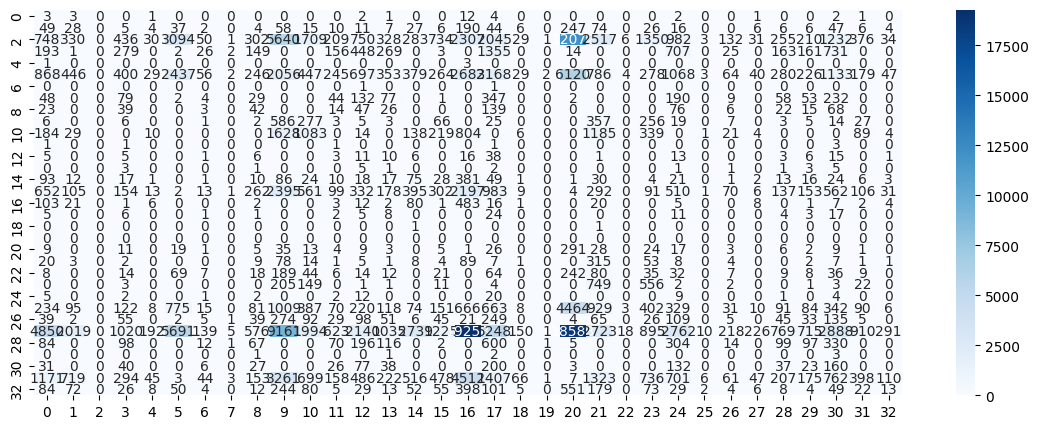

In [35]:
# Classification report and confusion matrix
plt.figure(figsize=(14, 5))
print(classification_report(y_true_classes_1, y_pred_classes_1))
conf_matrix_1 = confusion_matrix(y_true_classes_1, y_pred_classes_1)
sns.heatmap(conf_matrix_1, annot=True, fmt='d', cmap='Blues')
plt.show()

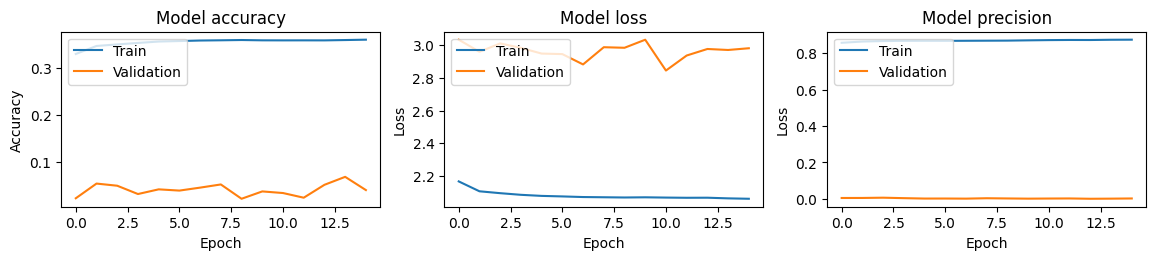

In [36]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(2, 3, 1)
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(2, 3, 2)
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(2, 3, 3)
plt.plot(history_1.history['precision'])
plt.plot(history_1.history['val_precision'])
plt.title('Model precision')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [37]:
# Get predictions
predictions_1 = model_1.predict(X_test_tf)

# Get top 3 crime types
top_3_indices = np.argsort(predictions_1, axis=1)[:, -3:][:, ::-1]

def load_type_encoder(encoder_filename):
    with open(encoder_filename, 'rb') as f:
        type_encoder = pickle.load(f)
    return type_encoder

# Example usage:
type_encoder = load_type_encoder('/kaggle/working/type_encoder.pkl')

# Initialize an empty list to store the top 3 predicted crime types for each sample
top_3_labels_1 = []

# Loop through each sample in top_3_indices and decode the labels
for indices in top_3_indices:
    labels = type_encoder.inverse_transform(indices)
    top_3_labels_1.append(labels)

# Convert the list to a numpy array
top_3_labels_1 = np.array(top_3_labels_1)

print("Top 3 predicted crime types for the test set:")
print(top_3_labels_1)
# Load encoder files
def load_encoder(encoder_filename):
    with open(encoder_filename, 'rb') as f:
        encoder = pickle.load(f)
    return encoder

# Load label encoders
city_encoder = load_encoder('city_encoder.pkl')
weekday_encoder = load_encoder('weekday_encoder.pkl')
daytime_encoder = load_encoder('daytime_encoder.pkl')
type_encoder = load_encoder('type_encoder.pkl')

# Function to transform input data
def transform_input(user_input):
    city_encoded = city_encoder.transform([user_input[0]])  # Encode city
    weekday_encoded = weekday_encoder.transform([user_input[6]])  # Encode weekday
    daytime_encoded = daytime_encoder.transform([user_input[7]])  # Encode daytime
    numerical_features = np.array(user_input[1:4]).reshape(1, -1)  # Numerical features (Year, Month, Day)
    latitude_scaled = latitude_scaler.transform(np.array(user_input[4]).reshape(-1, 1))[:, 0]  # Normalize latitude
    longitude_scaled = longitude_scaler.transform(np.array(user_input[5]).reshape(-1, 1))[:, 0]  # Normalize longitude
    input_features = np.concatenate([
        to_categorical(city_encoded, num_classes=len(city_encoder.classes_)),
        scaler.transform(numerical_features),  # Use MinMaxScaler for numerical features
        np.array([latitude_scaled, longitude_scaled]).reshape(1, -1),
        to_categorical(weekday_encoded, num_classes=len(weekday_encoder.classes_)),
        to_categorical(daytime_encoded, num_classes=len(daytime_encoder.classes_))
    ], axis=1)
    return input_features

# User input
user_input_1 = ['Los Angeles', 2024, 5, 27, 36.2938487, 118.38742647, 'Weekday', 'Nighttime']

# Transform user input
input_features_1 = transform_input(user_input_1)

# Make prediction
predictions_1 = model_1.predict(input_features_1)

# Get top 3 crime types
top_3_indices_1 = np.argsort(predictions_1, axis=1)[:, -3:][:, ::-1]
top_3_labels_1 = []

# Decode the predicted labels
for indices in top_3_indices_1:
    labels = type_encoder.inverse_transform(indices)
    top_3_labels_1.append(labels)

print("Top 3 predicted crime types:")
print(top_3_labels_1)
# Define the file path for saving the model
model_save_path_1 = 'type_pred_LSTM_1.h5'

# Save the model
model_1.save(model_save_path_1)

print("Model saved successfully at:", model_save_path_1)
with open('history_1.pkl', 'wb') as f:
    pickle.dump(history_1.history, f)

6859/6859 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step
Top 3 predicted crime types for the test set:
[['KIDNAPPING' 'EXTORTION' 'BATTERY']
 ['KIDNAPPING' 'THREAT' 'SEXUAL OFFENCE']
 ['ANIMAL ABUSE' 'HARASSMENT' 'FORGERY']
 ...
 ['MURDER' 'ASSAULT' 'THEFT']
 ['EXTORTION' 'TRESPASSING' 'CONTEMPT OF COURT']
 ['KIDNAPPING' 'RESISTING ARREST' 'EXTORTION']]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Top 3 predicted crime types:
[array(['TRESPASSING', 'BATTERY', 'CONTEMPT OF COURT'], dtype=object)]
Model saved successfully at: type_pred_LSTM_1.h5


**With Multi Layers Without SMOTE**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Reshape, Input, Dropout, BatchNormalization, Embedding
from tensorflow.keras.regularizers import l2

def build_model_ml(num_features, num_crime_types):
    model = Sequential([
        Input(shape=(num_features,)),
        Reshape((1, num_features)),
        
        LSTM(128, return_sequences=True),
        Dropout(0.5),
        BatchNormalization(),
        
        Dense(64, activation='relu'),
        Dropout(0.5),
        BatchNormalization(),
        
        # LSTM layers
        LSTM(64, return_sequences=True),
        Dropout(0.5),
        BatchNormalization(),
        
        Dense(32, activation='sigmoid'),
        Dropout(0.5),
        BatchNormalization(),

        LSTM(32, return_sequences=False),
        Dropout(0.5),
        BatchNormalization(),

        # Fully connected layers
        Dense(32, activation='relu'),
        Dropout(0.5),
        BatchNormalization(),
        Dense(num_crime_types, activation='softmax')
    ])

    # Compile the model with appropriate loss function and metrics
    opt = keras.optimizers.Adam(learning_rate=0.09)
    model.compile(loss='categorical_crossentropy', optimizer=opt,
                  metrics=['accuracy', 'precision', 'recall'])

    return model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Define number of features and number of crime types
num_features = X_train_tf.shape[1]
num_crime_types = y_train_tf.shape[1]

# Build the model
model_ml = build_model_ml(num_features, num_crime_types)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-2)

# Train the model
history_ml = model_ml.fit(
    X_train_tf, y_train_tf,
    epochs=15,  # Adjust epochs as needed
    batch_size=512,  # Adjust batch size as needed
    validation_data=(X_test_tf, y_test_tf), callbacks=[early_stopping, reduce_lr], verbose=1
)

# Evaluate the model
loss_ml, accuracy_ml, precision_ml, recall_ml = model_ml.evaluate(X_test_tf, y_test_tf)
print(f"Test Loss: {loss_ml}")
print(f"Test Accuracy: {accuracy_ml}")
print(f"Test Precision: {precision_ml}")
print(f"Test Recall: {recall_ml}")

In [ ]:
# Predict and evaluate the best model
y_pred_ml = model_ml.predict(X_test)
y_pred_classes_ml = np.argmax(y_pred_ml, axis=1)
y_true_classes_ml = np.argmax(y_test, axis=1)

plt.figure(figsize=(14, 5))
# Classification report and confusion matrix
print(classification_report(y_true_classes_ml, y_pred_classes_ml))
conf_matrix_ml = confusion_matrix(y_true_classes_ml, y_pred_classes_ml)
sns.heatmap(conf_matrix_ml, annot=True, fmt='d', cmap='Blues')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(2, 3, 1)
plt.plot(history_ml.history['accuracy'])
plt.plot(history_ml.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(2, 3, 2)
plt.plot(history_ml.history['loss'])
plt.plot(history_ml.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(2, 3, 3)
plt.plot(history_ml.history['precision'])
plt.plot(history_ml.history['val_precision'])
plt.title('Model precision')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


**Multi Layers With SMOTE**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Define number of features and number of crime types
num_features = X_train_tf.shape[1]
num_crime_types = y_train_tf.shape[1]

# Build the model
model_ml_1 = build_model_ml(num_features, num_crime_types)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-2)

# Train the model
history_ml_1 = model_ml_1.fit(
    X_train_resampled, y_train_resampled,
    epochs=15,  # Adjust epochs as needed
    batch_size=512,  # Adjust batch size as needed
    validation_data=(X_test_tf, y_test_tf), callbacks=[early_stopping, reduce_lr], verbose=1
)

# Evaluate the model
loss_ml_1, accuracy_ml_1, precision_ml_1, recall_ml_1 = model_ml_1.evaluate(X_test_tf, y_test_tf)
print(f"Test Loss: {loss_ml_1}")
print(f"Test Accuracy: {accuracy_ml_1}")
print(f"Test Precision: {precision_ml_1}")
print(f"Test Recall: {recall_ml_1}")

In [ ]:
# Predict and evaluate the best model
y_pred_ml_1 = model_ml_1.predict(X_test)
y_pred_classes_ml_1 = np.argmax(y_pred_ml_1, axis=1)
y_true_classes_ml_1 = np.argmax(y_test, axis=1)

plt.figure(figsize=(14, 5))
# Classification report and confusion matrix
print(classification_report(y_true_classes_ml_1, y_pred_classes_ml_1))
conf_matrix_ml_1 = confusion_matrix(y_true_classes_ml_1, y_pred_classes_ml_1)
sns.heatmap(conf_matrix_ml_1, annot=True, fmt='d', cmap='Blues')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(2, 3, 1)
plt.plot(history_ml_1.history['accuracy'])
plt.plot(history_ml_1.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(2, 3, 2)
plt.plot(history_ml_1.history['loss'])
plt.plot(history_ml_1.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(2, 3, 3)
plt.plot(history_ml_1.history['precision'])
plt.plot(history_ml_1.history['val_precision'])
plt.title('Model precision')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [ ]:
# # ROC curve and AUC
# fpr, tpr, _ = roc_curve(y_true_classes, y_pred)
# roc_auc = auc(fpr, tpr)
# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic')
# plt.legend(loc='lower right')
# plt.show()

**With Attention Layer with SMOTE**

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Layer

class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W_query = self.add_weight(name="att_weight_query", shape=(input_shape[0][-1], input_shape[0][-1]), initializer="normal")
        self.W_key = self.add_weight(name="att_weight_key", shape=(input_shape[1][-1], input_shape[1][-1]), initializer="normal")
        self.W_value = self.add_weight(name="att_weight_value", shape=(input_shape[2][-1], input_shape[2][-1]), initializer="normal")
        super(Attention, self).build(input_shape)

    def call(self, inputs):
        query, key, value = inputs

        # Linear transformations
        query = tf.tensordot(query, self.W_query, axes=[2, 0])
        key = tf.tensordot(key, self.W_key, axes=[2, 0])
        value = tf.tensordot(value, self.W_value, axes=[2, 0])

        # Compute attention scores
        scores = tf.matmul(query, key, transpose_b=True)
        scores = scores / tf.math.sqrt(tf.cast(tf.shape(key)[-1], tf.float32))

        # Apply softmax to get attention weights
        attention_weights = tf.nn.softmax(scores, axis=-1)

        # Compute weighted sum of value vectors
        output = tf.matmul(attention_weights, value)
        return output

    def compute_output_shape(self, input_shape):
        return input_shape[0][0], input_shape[0][1], input_shape[2][-1]


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, BatchNormalization, Reshape, Flatten
from tensorflow.keras.models import Model

def build_model_with_attention(input_shape, lstm_units=64, dropout_rate=0.5):
    inputs = Input(shape=(input_shape,))
    reshaped = Reshape((1, input_shape))(inputs)
    lstm_output = LSTM(lstm_units, return_sequences=True)(reshaped)
    dropout1 = Dropout(dropout_rate)(lstm_output)
    batch_norm1 = BatchNormalization()(dropout1)

    # Attention layer expects [query, key, value]
    attention_output = Attention()([batch_norm1, batch_norm1, batch_norm1])
    
    # Flatten the attention output to remove the sequence dimension
    attention_output_flat = Flatten()(attention_output)

    dense1 = Dense(32, activation='relu')(attention_output_flat)
    dropout2 = Dropout(dropout_rate)(dense1)
    batch_norm2 = BatchNormalization()(dropout2)
    outputs = Dense(y_train.shape[1], activation='softmax')(batch_norm2)

    model = Model(inputs, outputs)
    opt = keras.optimizers.Adam(learning_rate=0.05)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy', 'precision', 'recall'])
    return model

In [ ]:
# Callbacks
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-3)

# Train the model
model_att = build_model_with_attention(X_train.shape[1])
history_att = model_att.fit(X_train_resampled, y_train_resampled, epochs=15, batch_size=1024, 
                    validation_data=(X_test_tf, y_test_tf), callbacks=[early_stopping, reduce_lr], verbose=1)

In [ ]:
# Predict and evaluate the model
y_pred_att = model_att.predict(X_test)
y_pred_classes_att = np.argmax(y_pred_att, axis=1)
y_true_classes_att = np.argmax(y_test, axis=1)

In [ ]:
plt.figure(figsize=(14, 5))
# Classification report and confusion matrix
print(classification_report(y_true_classes_att, y_pred_classes_att))
conf_matrix_att = confusion_matrix(y_true_classes_att, y_pred_classes_att)
sns.heatmap(conf_matrix_att, annot=True, fmt='d', cmap='Blues')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(2, 3, 1)
plt.plot(history_att.history['accuracy'])
plt.plot(history_att.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(2, 3, 2)
plt.plot(history_att.history['loss'])
plt.plot(history_att.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(2, 3, 3)
plt.plot(history_att.history['precision'])
plt.plot(history_att.history['val_precision'])
plt.title('Model precision')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Layer

class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], input_shape[-1]), initializer="normal")
        self.b = self.add_weight(name="att_bias", shape=(input_shape[-1],), initializer="zeros")
        self.u = self.add_weight(name="att_u", shape=(input_shape[-1],), initializer="normal")
        super(Attention, self).build(input_shape)

    def call(self, x):
        # Applying the learned weight matrix and bias
        u_t = tf.tanh(tf.tensordot(x, self.W, axes=1) + self.b)
        # Computing the importance scores
        a = tf.nn.softmax(tf.tensordot(u_t, self.u, axes=1), axis=1)
        # Weighted sum of the input values
        output = tf.reduce_sum(x * tf.expand_dims(a, -1), axis=1)
        return output

    def compute_output_shape(self, input_shape):
        return input_shape[0], input_shape[-1]

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

In [ ]:
# Define the model with attention
def build_model_with_attention(lstm_units=64, dropout_rate=0.5):
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Reshape((1, X_train.shape[1])),
        LSTM(lstm_units, return_sequences=True),
        Dropout(dropout_rate),
        BatchNormalization(),
        Attention(),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        BatchNormalization(),
        Dense(y_train.shape[1], activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.09), loss='categorical_crossentropy', metrics=['accuracy', 'precision', 'recall'])
    return model

In [ ]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-2)

# Train the model
model_att = build_model_with_attention()
history_att = model_att.fit(X_train_resampled, y_train_resampled, epochs=15, batch_size=1024, validation_data=(X_test_tf, y_test_tf),
                    callbacks=[early_stopping, reduce_lr], verbose=1)




In [ ]:
# Predict and evaluate the model
y_pred_att = model_att.predict(X_test)
y_pred_classes_att = np.argmax(y_pred_att, axis=1)
y_true_classes_att = np.argmax(y_test_tf, axis=1)

In [ ]:
# Classification report and confusion matrix
print(classification_report(y_true_classes_att, y_pred_classes_att))
conf_matrix = confusion_matrix(y_true_classes_att, y_pred_classes_att)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.show()

In [ ]:
# Get predictions
predictions = model.predict(X_test_tf)

# Get top 3 crime types
top_3_indices = np.argsort(predictions, axis=1)[:, -3:][:, ::-1]

In [ ]:
# Get predictions
predictions = model.predict(X_test_tf)

# Get top 3 crime types
top_3_indices = np.argsort(predictions, axis=1)[:, -3:][:, ::-1]
def load_type_encoder(encoder_filename):
    with open(encoder_filename, 'rb') as f:
        type_encoder = pickle.load(f)
    return type_encoder

# Example usage:
type_encoder = load_type_encoder('/kaggle/working/type_encoder.pkl')

# Initialize an empty list to store the top 3 predicted crime types for each sample
top_3_labels = []

# Loop through each sample in top_3_indices and decode the labels
for indices in top_3_indices:
    labels = type_encoder.inverse_transform(indices)
    top_3_labels.append(labels)

# Convert the list to a numpy array
top_3_labels = np.array(top_3_labels)

print("Top 3 predicted crime types for the test set:")
print(top_3_labels)

In [ ]:
# Load encoder files
def load_encoder(encoder_filename):
    with open(encoder_filename, 'rb') as f:
        encoder = pickle.load(f)
    return encoder

# Load label encoders
city_encoder = load_encoder('city_encoder.pkl')
weekday_encoder = load_encoder('weekday_encoder.pkl')
daytime_encoder = load_encoder('daytime_encoder.pkl')
type_encoder = load_encoder('type_encoder.pkl')

# Function to transform input data
def transform_input(user_input):
    city_encoded = city_encoder.transform([user_input[0]])  # Encode city
    weekday_encoded = weekday_encoder.transform([user_input[6]])  # Encode weekday
    daytime_encoded = daytime_encoder.transform([user_input[7]])  # Encode daytime
    numerical_features = np.array(user_input[1:4]).reshape(1, -1)  # Numerical features (Year, Month, Day)
    latitude_scaled = latitude_scaler.transform(np.array(user_input[4]).reshape(-1, 1))[:, 0]  # Normalize latitude
    longitude_scaled = longitude_scaler.transform(np.array(user_input[5]).reshape(-1, 1))[:, 0]  # Normalize longitude
    input_features = np.concatenate([
        to_categorical(city_encoded, num_classes=len(city_encoder.classes_)),
        scaler.transform(numerical_features),  # Use MinMaxScaler for numerical features
        np.array([latitude_scaled, longitude_scaled]).reshape(1, -1),
        to_categorical(weekday_encoded, num_classes=len(weekday_encoder.classes_)),
        to_categorical(daytime_encoded, num_classes=len(daytime_encoder.classes_))
    ], axis=1)
    return input_features

# User input
user_input = ['Los Angeles', 2024, 5, 27, 36.2938487, 118.38742647, 'Weekday', 'Nighttime']

# Transform user input
input_features = transform_input(user_input)

# Make prediction
predictions = model.predict(input_features)

# Get top 3 crime types
top_3_indices = np.argsort(predictions, axis=1)[:, -3:][:, ::-1]
top_3_labels = []

# Decode the predicted labels
for indices in top_3_indices:
    labels = type_encoder.inverse_transform(indices)
    top_3_labels.append(labels)

print("Top 3 predicted crime types:")
print(top_3_labels)


In [ ]:
# Define the file path for saving the model
model_save_path = 'type_pred_LSTM_Att.h5'

# Save the model
model.save(model_save_path)

print("Model saved successfully at:", model_save_path)


In [ ]:
with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Reshape, Input, Dropout, BatchNormalization, Embedding, TimeDistributed
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

class Attention_1(Layer):
    def __init__(self, **kwargs):
        super(Attention_1, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name='att_weight', shape=(input_shape[-1], input_shape[-1]),
                                 initializer='random_normal', trainable=True)
        self.b = self.add_weight(name='att_bias', shape=(input_shape[-1],),
                                 initializer='zeros', trainable=True)
        super(Attention_1, self).build(input_shape)

    def call(self, inputs):
        q = K.dot(inputs, self.W) + self.b
        k = K.permute_dimensions(inputs, (0, 2, 1))
        score = K.batch_dot(q, k)
        score = K.softmax(score)
        v = K.batch_dot(score, inputs)
        return v


In [ ]:
def build_model_with_attention_1(lstm_units=64, dropout_rate=0.5):
    model = Sequential([
        Input(shape=(X_train_tf.shape[1],)),
        Reshape((1, X_train_tf.shape[1])),
        LSTM(lstm_units, return_sequences=True),
        Dropout(dropout_rate),
        BatchNormalization(),
        Attention_1(),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        BatchNormalization(),
        Dense(y_train_tf.shape[1], activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.09), loss='categorical_crossentropy', metrics=['accuracy', 'precision', 'recall'])
    return model

In [ ]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-2)

# Train the model
model_1 = build_model_with_attention_1()
# model_1.summary()

In [ ]:
history_1 = model_1.fit(X_train_resampled, y_train_resampled, epochs=30, batch_size=1024, validation_data=(X_test_tf, y_test_tf),
                    callbacks=[early_stopping, reduce_lr], verbose=1)
# Evaluate the model
loss_1, accuracy_1, precision_1, recall_1 = model_1.evaluate(X_test_tf, y_test_tf)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")
print(f"Test Precision: {precision}")
print(f"Test Recall: {recall}")

In [ ]:
pip install --upgrade scikit-learn
